In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline
import numpy as np

def ae(actual, predicted):
    """
    Computes the absolute error.
    This function computes the absolute error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The absolute error between actual and predicted
    """
    return np.abs(np.array(actual)-np.array(predicted))

def ce(actual, predicted):
    """
    Computes the classification error.
    This function computes the classification error between two lists
    Parameters
    ----------
    actual : list
             A list of the true classes
    predicted : list
                A list of the predicted classes
    Returns
    -------
    score : double
            The classification error between actual and predicted
    """
    return (sum([1.0 for x,y in zip(actual,predicted) if x != y]) /
            len(actual))

def mae(actual, predicted):
    """
    Computes the mean absolute error.
    This function computes the mean absolute error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The mean absolute error between actual and predicted
    """
    return np.mean(ae(actual, predicted))

def mse(actual, predicted):
    """
    Computes the mean squared error.
    This function computes the mean squared error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The mean squared error between actual and predicted
    """
    return np.mean(se(actual, predicted))

def msle(actual, predicted):
    """
    Computes the mean squared log error.
    This function computes the mean squared log error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The mean squared log error between actual and predicted
    """
    return np.mean(sle(actual, predicted))

def rmse(actual, predicted):
    """
    Computes the root mean squared error.
    This function computes the root mean squared error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The root mean squared error between actual and predicted
    """
    return np.sqrt(mse(actual, predicted))

def rmsle(actual, predicted):
    """
    Computes the root mean squared log error.
    This function computes the root mean squared log error between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The root mean squared log error between actual and predicted
    """
    return np.sqrt(msle(actual, predicted))

def se(actual, predicted):
    """
    Computes the squared error.
    This function computes the squared error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The squared error between actual and predicted
    """
    return np.power(np.array(actual)-np.array(predicted), 2)

def sle(actual, predicted):
    """
    Computes the squared log error.
    This function computes the squared log error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The squared log error between actual and predicted
    """
    return (np.power(np.log(np.array(actual)+1) - 
            np.log(np.array(predicted)+1), 2))

def ll(actual, predicted):
    """
    Computes the log likelihood.
    This function computes the log likelihood between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The log likelihood error between actual and predicted
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    err = np.seterr(all='ignore')
    score = -(actual*np.log(predicted)+(1-actual)*np.log(1-predicted))
    np.seterr(divide=err['divide'], over=err['over'],
              under=err['under'], invalid=err['invalid'])
    if type(score)==np.ndarray:
        score[np.isnan(score)] = 0
    else:
        if np.isnan(score):
            score = 0
    return score

def log_loss(actual, predicted):
    """
    Computes the log loss.
    This function computes the log loss between two lists
    of numbers.
    Parameters
    ----------
    actual : list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double
            The log loss between actual and predicted
    """
    return np.mean(ll(actual, predicted))

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [5]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b6f7e37b8>]], dtype=object)

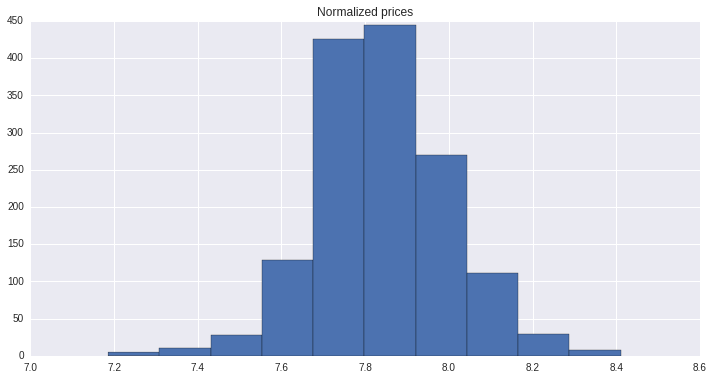

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({ "Price":train["SalePrice"]})
from scipy.stats import boxcox
prices = boxcox(prices)
SalePrice = pd.DataFrame({ "Normalized prices":prices[0].flatten()})
SalePrice.hist()

In [7]:
lambda_ = prices[1][0]
lambda_
original = (SalePrice*lambda_ + 1)**(1/lambda_)

In [8]:
# transformed the target:
train["SalePrice"] = SalePrice

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))#compute skewness
print (skewed_feats)
skewed_feats = skewed_feats[skewed_feats > 0.0]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64


In [9]:

all_data = pd.get_dummies(all_data)

In [10]:
all_data = all_data.fillna(all_data.mean())

In [11]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [12]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [13]:
model_ridge = Ridge()

In [18]:
model_lasso = LassoCV(alphas = ls).fit(X_train, y)

In [20]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print (coef)

MSSubClass              -0.001831
LotFrontage              0.000019
LotArea                  0.029308
OverallQual              0.105225
OverallCond              0.095499
YearBuilt                0.000599
YearRemodAdd             0.000363
MasVnrArea              -0.000000
BsmtFinSF1               0.003549
BsmtFinSF2              -0.000542
BsmtUnfSF               -0.001942
TotalBsmtSF              0.009079
1stFlrSF                 0.009742
2ndFlrSF                -0.001476
LowQualFinSF            -0.002135
GrLivArea                0.179535
BsmtFullBath             0.013360
BsmtHalfBath             0.000000
FullBath                 0.011918
HalfBath                 0.007356
BedroomAbvGr            -0.000000
KitchenAbvGr            -0.021412
TotRmsAbvGrd             0.000000
Fireplaces               0.014099
GarageYrBlt              0.000021
GarageCars               0.018515
GarageArea               0.001773
WoodDeckSF               0.001693
OpenPorchSF              0.000647
EnclosedPorch 

In [21]:
model_lasso.alpha_

0.00011400000000000001

In [22]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 135 variables and eliminated the other 153 variables


In [23]:
imp_coef = pd.concat([coef.sort_index().head(10),
                     coef.sort_index().tail(10)])

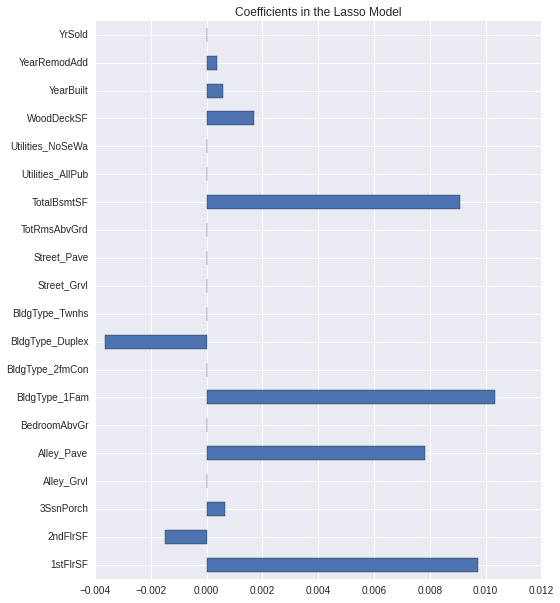

In [24]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [25]:
model_lasso.score(X_train,y)

0.93561344428459947

In [28]:
predictions = (model_lasso.predict(X_test)*lambda_ + 1)**(1/lambda_)
output = pd.DataFrame({ "id":test.Id, 'SalePrice': predictions })
output.to_csv('price9.csv', index = False)


In [29]:
predictions

array([ 118219.91141575,  153099.98583825,  185097.11852274, ...,
        168353.1686408 ,  118488.50550143,  220890.75674756])